### Objective: Predict if a mail is spam or not 

**Data Description:** 
    
Refer: https://archive.ics.uci.edu/ml/datasets/spambase for detailed data description

* Number of Observations: 4601 (1813 Spam = 39.4%)
* Number of Attributes: 58 (57 continuous, 1 nominal class label)

** Attributes **

* 48 continuous real [0,100] attributes of type word_freq_WORD = percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

* 6 continuous real [0,100] attributes of type char_freq_CHAR] = percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

* 1 continuous real [1,...] attribute of type capital_run_length_average  = average length of uninterrupted sequences of capital letters 

* 1 continuous integer [1,...] attribute of type capital_run_length_longest = length of longest uninterrupted sequence of capital letters 

* 1 continuous integer [1,...] attribute of type capital_run_length_total  = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail 

* 1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

** K-Nearest Neighbors Classifier **

In this classification technique, the distance between the new point (unlabelled) and all the other labelled points is computed. The K-closest labelled points are obtained and the majority vote of their classes is the class assigned to the unlabelled point. All ties are broken arbitrarily. 


** Data used for this implementation is available at [Github Link](https://github.com/anujk3/ml_datasets/tree/master/ml-knn)**

### k-NN Algorithm for k = 1, 2 ... 20

In [55]:
## Imports and Loading Data

import numpy as np
import matplotlib.pyplot as plt
import operator
#import scipy
from scipy.special import expit
%matplotlib inline


X_train = np.genfromtxt('hw2-data/X_train.csv', delimiter=',')
y_train = np.genfromtxt('hw2-data/y_train.csv')

X_test = np.genfromtxt('hw2-data/X_test.csv', delimiter=',')
y_test = np.genfromtxt('hw2-data/y_test.csv')

In [56]:
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum(np.power(vector1-vector2, 2)))
def absolute_distance(vector1, vector2):
    return np.sum(np.absolute(vector1-vector2))

In [57]:
def get_neighbours(X_train, X_test_instance, k):
    distances = []
    neighbors = []
    for i in xrange(0, X_train.shape[0]):
        dist = absolute_distance(X_train[i], X_test_instance)
        distances.append((i, dist))
    distances.sort(key=operator.itemgetter(1))
    for x in xrange(k):
        #print distances[x]
        neighbors.append(distances[x][0])
    return neighbors

In [58]:
def predictkNNClass(output, y_train):
    classVotes = {}
    for i in xrange(len(output)):
#         print output[i], y_train[output[i]]
        if y_train[output[i]] in classVotes:
            classVotes[y_train[output[i]]] += 1
        else:
            classVotes[y_train[output[i]]] = 1
    sortedVotes = sorted(classVotes.iteritems(), key=operator.itemgetter(1), reverse=True)
    #print sortedVotes
    return sortedVotes[0][0]

In [59]:
def kNN_test(X_train, X_test, Y_train, Y_test, k):
    output_classes = []
    for i in xrange(0, X_test.shape[0]):
        output = get_neighbours(X_train, X_test[i], k)
        predictedClass = predictkNNClass(output, Y_train)
        output_classes.append(predictedClass)
    return output_classes

In [60]:
def prediction_accuracy(predicted_labels, original_labels):
    count = 0
    for i in xrange(len(predicted_labels)):
        if predicted_labels[i] == original_labels[i]:
            count += 1
    #print count, len(predicted_labels)
    return float(count)/len(predicted_labels)

In [61]:
predicted_classes = {}
final_accuracies = {}
for k in xrange(1, 21):
    predicted_classes[k] = kNN_test(X_train, X_test, y_train, y_test, k)
    final_accuracies[k] = prediction_accuracy(predicted_classes[k], y_test)

### Showing Prediction Accuracy as a function of K

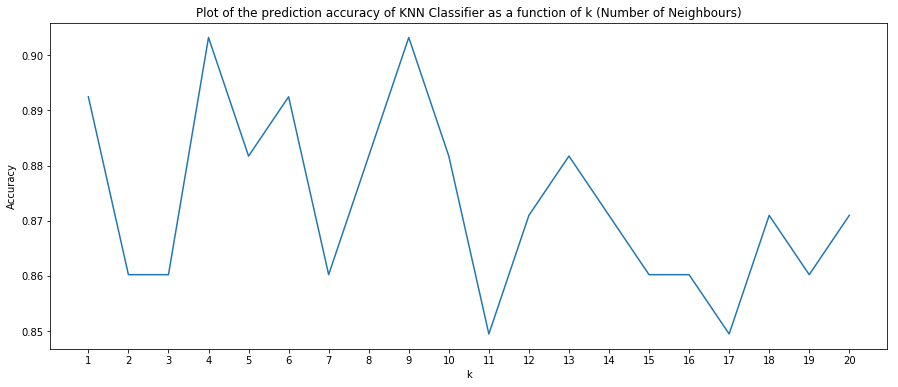

In [62]:
plt.figure(figsize=(15, 6))
plt.plot(final_accuracies.keys(), final_accuracies.values())
plt.xticks(final_accuracies.keys())
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Plot of the prediction accuracy of KNN Classifier as a function of k (Number of Neighbours)")
plt.show()

### Showing Prediction Accuracy as a function of K (adjusted y-scale to between 0-1)

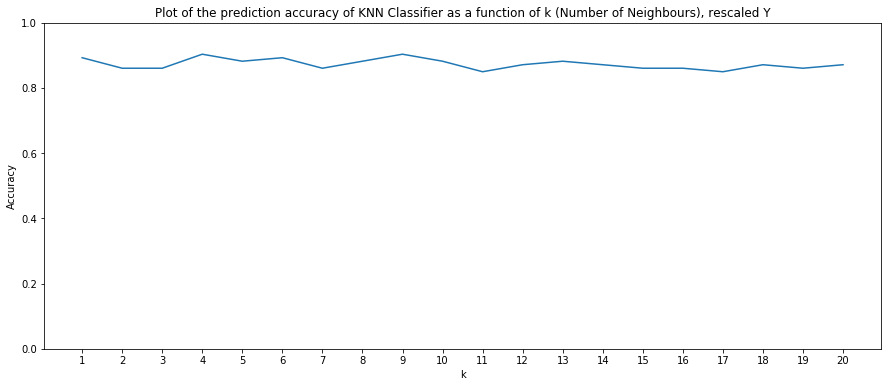

In [63]:
plt.figure(figsize=(15, 6))
plt.plot(final_accuracies.keys(), final_accuracies.values())
plt.ylim([0, 1])
plt.xticks(final_accuracies.keys())
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Plot of the prediction accuracy of KNN Classifier as a function of k (Number of Neighbours), rescaled Y")
plt.show()

---